In [1]:
#04_random_walks_02.ipynb,隨機漫步說明,使用numpy

In [2]:
import numpy as np #import numpy module as alias np

In [3]:
import matplotlib.pyplot as plt #import matplotlib

In [4]:
%matplotlib inline

In [5]:
nsteps=1000 #設定 1000 步

In [6]:
draws=np.random.randint(0,2,size=nsteps) #產生1000個 0或1 的numpy.ndarray object draws

In [7]:
steps=np.where(draws > 0,1,-1) #以np.where() function將 draws中 1-->1, 0-->-1

In [8]:
walk=steps.cumsum() #method cumsum() 

In [9]:
#繪圖

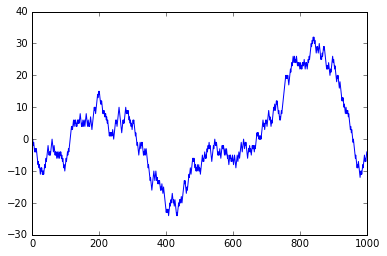

In [10]:
plt.plot(walk)

In [11]:
#利用min()/max() method, 求最小/最大值,隨機漫步統計分析

In [12]:
walk.min() #利用 min() method, 求最小值

-24

In [13]:
walk.max() #利用 max() method, 求最大值

32

In [14]:
# 隨機漫步統計分析 複雜範例: first crossing time

In [15]:
(np.abs(walk) >= 10).argmax() #np.abs() function 逐一求 walk 中元素絕對值
                              #(np.abs(walk)>=10) 將傳回 True or False
                              #第一個 True 的索引值,以 argmax() method 求出   

23

In [16]:
#example3: Simulating Many Random Walks at Once

In [17]:
nwalks=5000 #5000 個隨機漫步

In [18]:
nsteps=1000 #1000 步

In [19]:
draws=np.random.randint(0,2,size=(nwalks,nsteps)) # 5000x1000 ndarray, 元素值為0 or 1 

In [20]:
steps=np.where(draws>0,1,-1) #將 0-->-1, 1-->1

In [21]:
walks=steps.cumsum(1) #沿 axis1 cumsum, (每一個隨機漫步,共5000個)

In [22]:
walks #每一個隨機漫步,共5000個

array([[  1,   2,   3, ...,   6,   7,   6],
       [  1,   2,   1, ...,  14,  15,  14],
       [ -1,   0,   1, ..., -18, -19, -20],
       ..., 
       [ -1,   0,   1, ..., -58, -57, -56],
       [ -1,  -2,  -1, ..., -26, -25, -26],
       [  1,   0,  -1, ...,   6,   5,   4]], dtype=int32)

In [23]:
#統計所有隨機漫步,walks 中 max/min

In [24]:
walks.max()

130

In [27]:
(walks.max(1)).argmax()

3066

In [33]:
walks.min()

-141

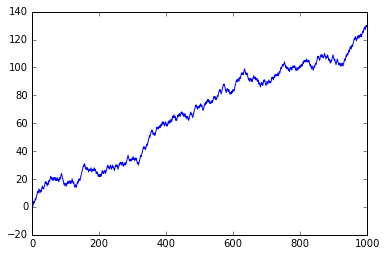

In [31]:
#練習1: 請將有最大偏離值的實驗，繪圖 


In [34]:
#first crossing time,compute the minimum crossing time to 30 or -30

In [35]:
#但並不是所有5000次皆有穿越30,需先使用any() methond 檢驗

In [36]:
hits30=(np.abs(walks)>=30).any(1) #any(1), 沿axis1 使用 any(), 
                                  #即檢查每次隨機漫步中 有任一穿越30者為true
                                  #共檢查5000次

In [37]:
hits30 #一個布林值陣列, 大小為 5000

array([ True,  True,  True, ..., False,  True,  True], dtype=bool)

In [38]:
hits30.sum() #統計true (穿越30) 的個數

3425

In [39]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1) #每個穿越點
                                                     #說明-->999

In [40]:
crossing_times

array([475, 633, 231, ..., 203, 401, 795], dtype=int64)

In [41]:
crossing_times.mean() #求平均

504.64204379562045

In [42]:
#用其他分布方式得到漫步數據,如 numpy.random.normal() 

In [43]:
steps2=np.random.normal(loc=0,scale=0.25,size=(nwalks,nsteps))

In [44]:
#999 --> 分解說明 (np.abs(walks[hits30])>=30).argmax(1) 

In [45]:
walks #5000x1000, axis1是已經cumsum,

array([[ -1,   0,  -1, ...,  32,  31,  30],
       [  1,   0,  -1, ...,  60,  61,  62],
       [ -1,   0,   1, ...,  24,  23,  22],
       ..., 
       [ -1,  -2,  -3, ..., -14, -13, -12],
       [  1,   0,  -1, ..., -42, -41, -40],
       [  1,   2,   1, ...,  24,  25,  24]], dtype=int32)

In [46]:
hits30 #布林陣列

array([ True,  True,  True, ..., False,  True,  True], dtype=bool)

In [47]:
walks[hits30] #walks陣列與 hits30布林陣列運算, true的元素才出現

array([[ -1,   0,  -1, ...,  32,  31,  30],
       [  1,   0,  -1, ...,  60,  61,  62],
       [ -1,   0,   1, ...,  24,  23,  22],
       ..., 
       [  1,   0,   1, ...,  24,  25,  24],
       [  1,   0,  -1, ..., -42, -41, -40],
       [  1,   2,   1, ...,  24,  25,  24]], dtype=int32)

In [48]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1) #argmax(1),沿著axis1
                                                     #找到第一個穿越30元素的 index
                                                     #每一個axis0 會找到一個,共3399
                                                     #個,形成一個一維陣列

In [49]:
crossing_times

array([475, 633, 231, ..., 203, 401, 795], dtype=int64)

In [ ]:
##練習1: 請將有最大偏離值的實驗，繪圖 參考解答
plt.plot(walks[(np.abs(walks).max(1)).argmax()])